## Visualizations - Part 1

In [589]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [590]:
import matplotlib
matplotlib.__version__

'3.10.0'

In [591]:
matplotlib.rcParams['agg.path.chunksize'] = 20000  # Adjusting plot parametes

In [592]:
matplotlib.rcParams['path.simplify_threshold'] = 0.05  # Lowering threshold value

In [593]:
df = pd.read_csv('ny_city_data.csv', index_col = 0)

C:\Users\gerar\AppData\Local\Temp\ipykernel_27984\1088745411.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ny_city_data.csv', index_col = 0)


In [594]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'bike_rides_daily_x',
       'bike_rides_daily_y', '_merge'],
      dtype='object')

In [595]:
# Error Handling through try-except
try: 
    df.drop(columns = ['_merge','bike_rides_daily_x', 'bike_rides_daily_y'], inplace = True)
except Exception as e:
    print(e)
    df.drop(columns = ['_merge'], inplace = True)

In [596]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,836A7ACB7EA1509C,classic_bike,2022-01-01 13:57:57.215,2022-01-01 14:03:00.980,University Pl & E 8 St,5755.14,W 15 St & 6 Ave,5989.02,40.731437,-73.994903,40.738046,-73.996430,member,2022-01-01,11.6
1,F26D6C68FC186BEA,electric_bike,2022-01-01 23:52:13.865,2022-01-01 23:56:42.089,Water St & Main St,4936.14,Hicks St & Montague St,4645.09,40.703212,-73.990409,40.695128,-73.995951,member,2022-01-01,11.6
2,9D313B86A2A435D4,electric_bike,2022-01-01 18:06:53.687,2022-01-01 18:15:52.718,Carroll St & Smith St,4225.14,4 Ave & 3 St,4028.04,40.680611,-73.994758,40.673746,-73.985649,member,2022-01-01,11.6
3,D8F1DF07CA23408B,classic_bike,2022-01-01 16:12:09.859,2022-01-01 16:14:13.249,2 Ave & E 31 St,6197.02,E 31 St & 3 Ave,6239.08,40.742909,-73.977061,40.743943,-73.979661,member,2022-01-01,11.6
4,278852ECDAF6DFC9,electric_bike,2022-01-01 19:18:58.289,2022-01-01 19:27:29.446,31 Ave & Steinway St,6782.01,36 Ave & 10 St,6737.03,40.761149,-73.917007,40.761438,-73.941126,member,2022-01-01,11.6


In [597]:
df.shape

(298382, 15)

In [598]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [599]:
df['date'] = pd.to_datetime(df['date'])

In [600]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

### Basic plotting with pandas

In [602]:
df_temp = df.set_index('date')

In [603]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-01,836A7ACB7EA1509C,classic_bike,2022-01-01 13:57:57.215,2022-01-01 14:03:00.980,University Pl & E 8 St,5755.14,W 15 St & 6 Ave,5989.02,40.731437,-73.994903,40.738046,-73.996430,member,11.6
2022-01-01,F26D6C68FC186BEA,electric_bike,2022-01-01 23:52:13.865,2022-01-01 23:56:42.089,Water St & Main St,4936.14,Hicks St & Montague St,4645.09,40.703212,-73.990409,40.695128,-73.995951,member,11.6
2022-01-01,9D313B86A2A435D4,electric_bike,2022-01-01 18:06:53.687,2022-01-01 18:15:52.718,Carroll St & Smith St,4225.14,4 Ave & 3 St,4028.04,40.680611,-73.994758,40.673746,-73.985649,member,11.6
2022-01-01,D8F1DF07CA23408B,classic_bike,2022-01-01 16:12:09.859,2022-01-01 16:14:13.249,2 Ave & E 31 St,6197.02,E 31 St & 3 Ave,6239.08,40.742909,-73.977061,40.743943,-73.979661,member,11.6
2022-01-01,278852ECDAF6DFC9,electric_bike,2022-01-01 19:18:58.289,2022-01-01 19:27:29.446,31 Ave & Steinway St,6782.01,36 Ave & 10 St,6737.03,40.761149,-73.917007,40.761438,-73.941126,member,11.6


### Procedural approach

In [605]:
# Sorting index so time series works as intended
df_temp_sorted = df_temp.sort_index()

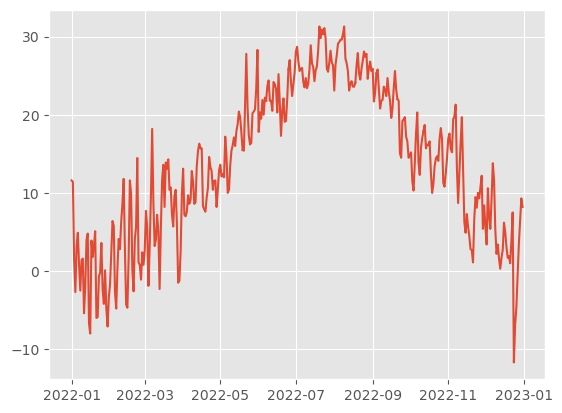

In [606]:
plt.plot(df_temp_sorted['avgTemp'])
plt.show()

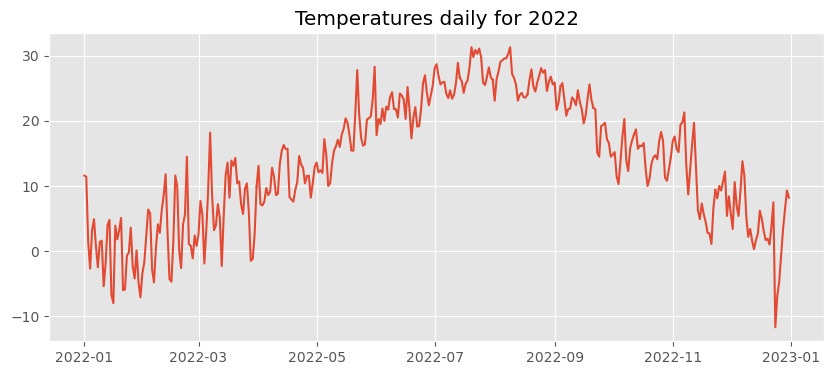

In [607]:
# reminder: figsize=(x-axis size, y-axis size)
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp_sorted['avgTemp'])
plt.show()

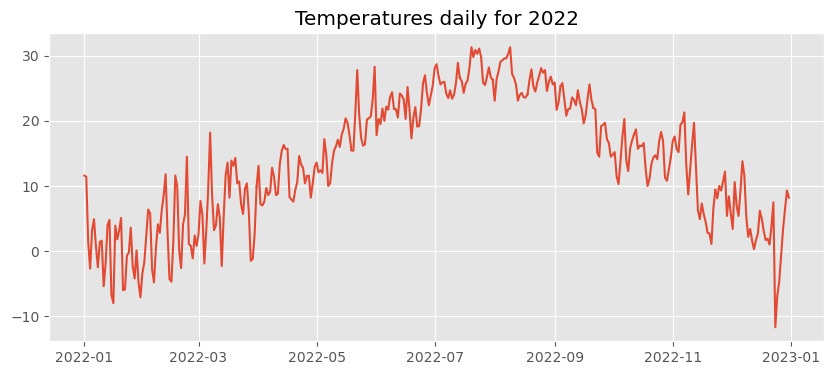

In [608]:
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp_sorted['avgTemp'])
plt.show()

### Aggregate trips 

In [610]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [611]:
# Groupby the count of the trips 

df_group = df.groupby(['date'])['ride_id'].count().reset_index()
df_group.head()

,date,ride_id
0,2022-01-01,213
1,2022-01-02,432
2,2022-01-03,349
3,2022-01-04,363
4,2022-01-05,326


In [612]:
# experiment with as_index
#df.groupby(['date'], as_index= False)['ride_id'].count()

In [613]:
df_group

,date,ride_id
0,2022-01-01,213
1,2022-01-02,432
2,2022-01-03,349
3,2022-01-04,363
4,2022-01-05,326
...,...,...
360,2022-12-27,340
361,2022-12-28,474
362,2022-12-29,527
363,2022-12-30,599


In [614]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,836A7ACB7EA1509C,classic_bike,2022-01-01 13:57:57.215,2022-01-01 14:03:00.980,University Pl & E 8 St,5755.14,W 15 St & 6 Ave,5989.02,40.731437,-73.994903,40.738046,-73.996430,member,2022-01-01,11.6
1,F26D6C68FC186BEA,electric_bike,2022-01-01 23:52:13.865,2022-01-01 23:56:42.089,Water St & Main St,4936.14,Hicks St & Montague St,4645.09,40.703212,-73.990409,40.695128,-73.995951,member,2022-01-01,11.6
2,9D313B86A2A435D4,electric_bike,2022-01-01 18:06:53.687,2022-01-01 18:15:52.718,Carroll St & Smith St,4225.14,4 Ave & 3 St,4028.04,40.680611,-73.994758,40.673746,-73.985649,member,2022-01-01,11.6
3,D8F1DF07CA23408B,classic_bike,2022-01-01 16:12:09.859,2022-01-01 16:14:13.249,2 Ave & E 31 St,6197.02,E 31 St & 3 Ave,6239.08,40.742909,-73.977061,40.743943,-73.979661,member,2022-01-01,11.6
4,278852ECDAF6DFC9,electric_bike,2022-01-01 19:18:58.289,2022-01-01 19:27:29.446,31 Ave & Steinway St,6782.01,36 Ave & 10 St,6737.03,40.761149,-73.917007,40.761438,-73.941126,member,2022-01-01,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298377,299D17348897C349,classic_bike,2022-12-31 09:07:11.644,2022-12-31 09:14:09.111,Park Ave & E 124 St,7682.01,Lenox Ave & W 133 St,7790.04,40.804555,-73.939686,40.812960,-73.941878,member,2022-12-31,8.2
298378,4A1A093E747ED8B9,electric_bike,2022-12-31 08:06:30.869,2022-12-31 08:19:23.205,Carroll St & 6 Ave,4019.06,Schermerhorn St & Court St,4565.07,40.674111,-73.978698,40.691036,-73.992011,member,2022-12-31,8.2
298379,EDE1A533083DE1DF,electric_bike,2022-12-31 01:41:17.411,2022-12-31 01:49:50.849,E 2 St & Avenue A,5553.1,Leonard St & Church St,5359.11,40.723046,-73.985930,40.717571,-74.005549,member,2022-12-31,8.2
298380,2B8F4D757C7A5EAE,electric_bike,2022-12-31 18:16:38.356,2022-12-31 18:23:09.827,8 Ave & W 31 St,6450.05,W 22 St & 10 Ave,6306.06,40.750585,-73.994685,40.746920,-74.004519,casual,2022-12-31,8.2


In [615]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          298382
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (0, 17)
Shape of January 2nd is (0, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [616]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,bike_rides_daily,_merge
0,836A7ACB7EA1509C,classic_bike,2022-01-01 13:57:57.215,2022-01-01 14:03:00.980,University Pl & E 8 St,5755.14,W 15 St & 6 Ave,5989.02,40.731437,-73.994903,40.738046,-73.996430,member,2022-01-01,11.6,213,both
1,F26D6C68FC186BEA,electric_bike,2022-01-01 23:52:13.865,2022-01-01 23:56:42.089,Water St & Main St,4936.14,Hicks St & Montague St,4645.09,40.703212,-73.990409,40.695128,-73.995951,member,2022-01-01,11.6,213,both
2,9D313B86A2A435D4,electric_bike,2022-01-01 18:06:53.687,2022-01-01 18:15:52.718,Carroll St & Smith St,4225.14,4 Ave & 3 St,4028.04,40.680611,-73.994758,40.673746,-73.985649,member,2022-01-01,11.6,213,both
3,D8F1DF07CA23408B,classic_bike,2022-01-01 16:12:09.859,2022-01-01 16:14:13.249,2 Ave & E 31 St,6197.02,E 31 St & 3 Ave,6239.08,40.742909,-73.977061,40.743943,-73.979661,member,2022-01-01,11.6,213,both
4,278852ECDAF6DFC9,electric_bike,2022-01-01 19:18:58.289,2022-01-01 19:27:29.446,31 Ave & Steinway St,6782.01,36 Ave & 10 St,6737.03,40.761149,-73.917007,40.761438,-73.941126,member,2022-01-01,11.6,213,both


In [617]:
# Delete rows with a year 2021
df = df.loc[df['date'].dt.year != 2021]             

In [618]:
# Reset index
df = df.reset_index(drop = True)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,bike_rides_daily,_merge
0,836A7ACB7EA1509C,classic_bike,2022-01-01 13:57:57.215,2022-01-01 14:03:00.980,University Pl & E 8 St,5755.14,W 15 St & 6 Ave,5989.02,40.731437,-73.994903,40.738046,-73.996430,member,2022-01-01,11.6,213,both
1,F26D6C68FC186BEA,electric_bike,2022-01-01 23:52:13.865,2022-01-01 23:56:42.089,Water St & Main St,4936.14,Hicks St & Montague St,4645.09,40.703212,-73.990409,40.695128,-73.995951,member,2022-01-01,11.6,213,both
2,9D313B86A2A435D4,electric_bike,2022-01-01 18:06:53.687,2022-01-01 18:15:52.718,Carroll St & Smith St,4225.14,4 Ave & 3 St,4028.04,40.680611,-73.994758,40.673746,-73.985649,member,2022-01-01,11.6,213,both
3,D8F1DF07CA23408B,classic_bike,2022-01-01 16:12:09.859,2022-01-01 16:14:13.249,2 Ave & E 31 St,6197.02,E 31 St & 3 Ave,6239.08,40.742909,-73.977061,40.743943,-73.979661,member,2022-01-01,11.6,213,both
4,278852ECDAF6DFC9,electric_bike,2022-01-01 19:18:58.289,2022-01-01 19:27:29.446,31 Ave & Steinway St,6782.01,36 Ave & 10 St,6737.03,40.761149,-73.917007,40.761438,-73.941126,member,2022-01-01,11.6,213,both


In [619]:
# Re-write data to get the correct version
df.to_csv('ny_city_data.csv')

In [620]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,bike_rides_daily,_merge
0,836A7ACB7EA1509C,classic_bike,2022-01-01 13:57:57.215,2022-01-01 14:03:00.980,University Pl & E 8 St,5755.14,W 15 St & 6 Ave,5989.02,40.731437,-73.994903,40.738046,-73.996430,member,2022-01-01,11.6,213,both
1,F26D6C68FC186BEA,electric_bike,2022-01-01 23:52:13.865,2022-01-01 23:56:42.089,Water St & Main St,4936.14,Hicks St & Montague St,4645.09,40.703212,-73.990409,40.695128,-73.995951,member,2022-01-01,11.6,213,both
2,9D313B86A2A435D4,electric_bike,2022-01-01 18:06:53.687,2022-01-01 18:15:52.718,Carroll St & Smith St,4225.14,4 Ave & 3 St,4028.04,40.680611,-73.994758,40.673746,-73.985649,member,2022-01-01,11.6,213,both
3,D8F1DF07CA23408B,classic_bike,2022-01-01 16:12:09.859,2022-01-01 16:14:13.249,2 Ave & E 31 St,6197.02,E 31 St & 3 Ave,6239.08,40.742909,-73.977061,40.743943,-73.979661,member,2022-01-01,11.6,213,both
4,278852ECDAF6DFC9,electric_bike,2022-01-01 19:18:58.289,2022-01-01 19:27:29.446,31 Ave & Steinway St,6782.01,36 Ave & 10 St,6737.03,40.761149,-73.917007,40.761438,-73.941126,member,2022-01-01,11.6,213,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298377,299D17348897C349,classic_bike,2022-12-31 09:07:11.644,2022-12-31 09:14:09.111,Park Ave & E 124 St,7682.01,Lenox Ave & W 133 St,7790.04,40.804555,-73.939686,40.812960,-73.941878,member,2022-12-31,8.2,306,both
298378,4A1A093E747ED8B9,electric_bike,2022-12-31 08:06:30.869,2022-12-31 08:19:23.205,Carroll St & 6 Ave,4019.06,Schermerhorn St & Court St,4565.07,40.674111,-73.978698,40.691036,-73.992011,member,2022-12-31,8.2,306,both
298379,EDE1A533083DE1DF,electric_bike,2022-12-31 01:41:17.411,2022-12-31 01:49:50.849,E 2 St & Avenue A,5553.1,Leonard St & Church St,5359.11,40.723046,-73.985930,40.717571,-74.005549,member,2022-12-31,8.2,306,both
298380,2B8F4D757C7A5EAE,electric_bike,2022-12-31 18:16:38.356,2022-12-31 18:23:09.827,8 Ave & W 31 St,6450.05,W 22 St & 10 Ave,6306.06,40.750585,-73.994685,40.746920,-74.004519,casual,2022-12-31,8.2,306,both


In [621]:
df = df.set_index('date')

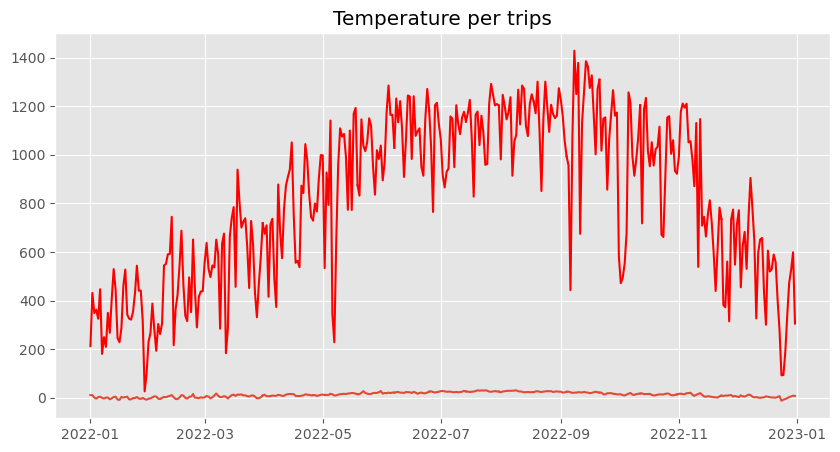

In [622]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df['avgTemp'])
plt.plot(df['bike_rides_daily'], color = 'red')
plt.show()

### OO approach

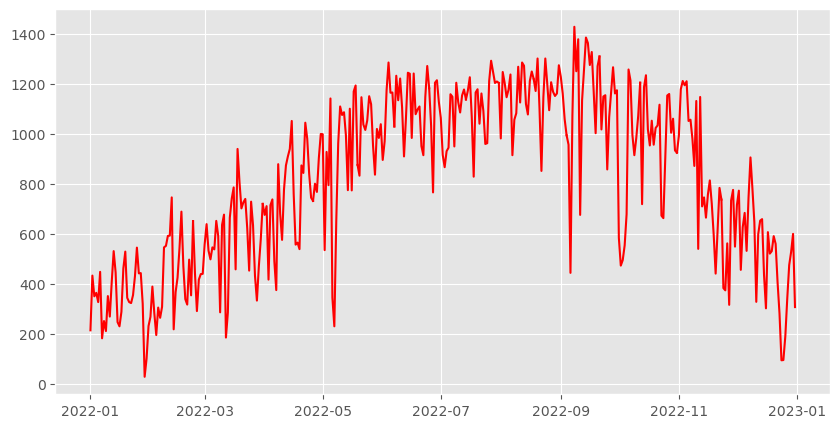

In [624]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "red")

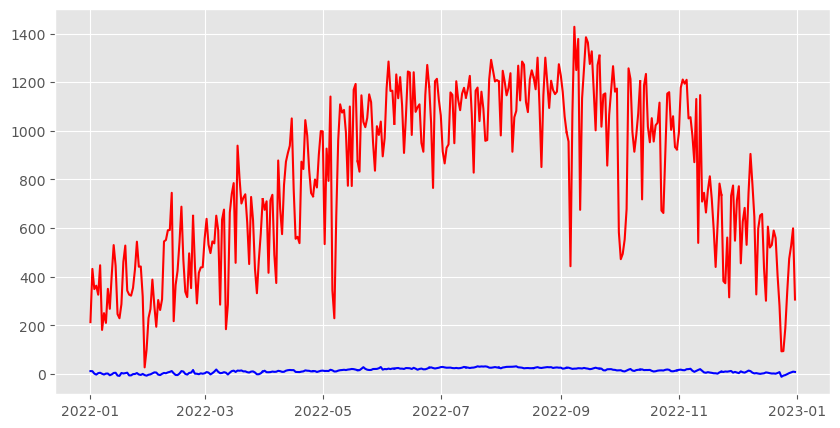

In [625]:
# Create figure and axis objects with subplots()

fig, ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "red")
ax.plot(df['avgTemp'], color = 'blue')

In [626]:
y, a = (1,2)
print(y)
print(a)

1
2


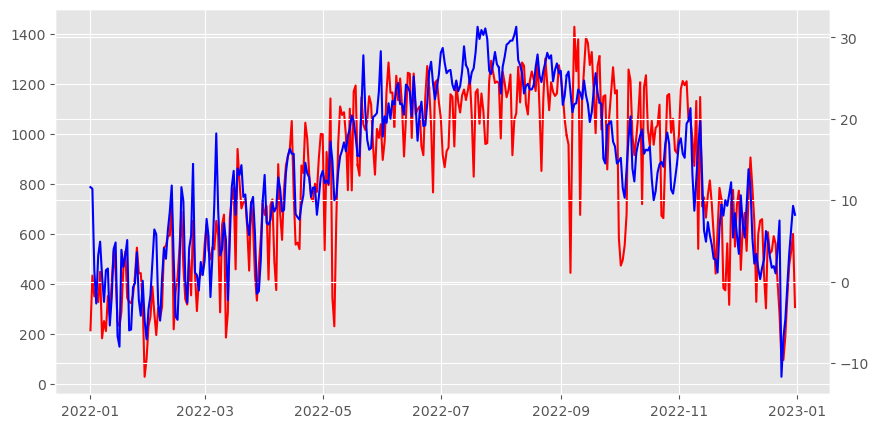

In [627]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df["avgTemp"], color = "blue")
#plt.show()

#### Final dual plot

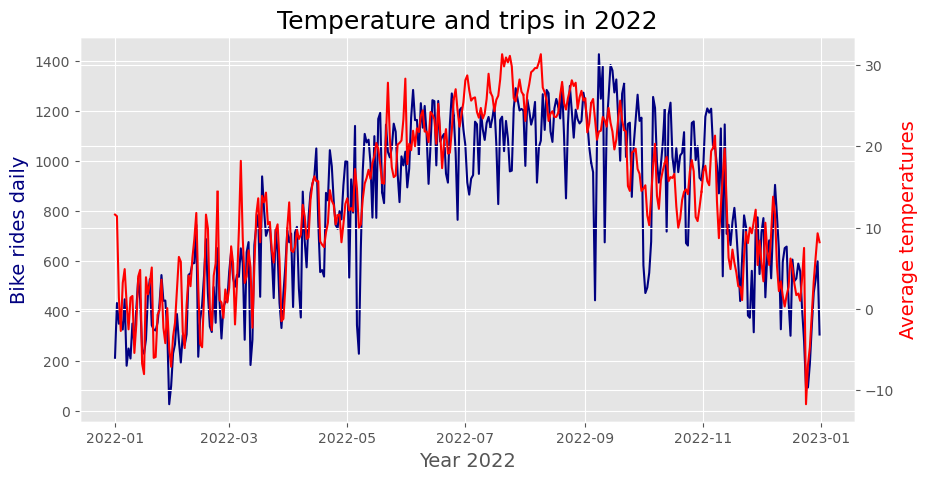

In [629]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### I used the Object Oriented approach for this task. I created 2 axis using "ax2 = ax.twinx()". I also specified certain paramenters such as line color and the font size of the axis. 

In [675]:
# Use specific style of plotting
plt.style.use('ggplot')

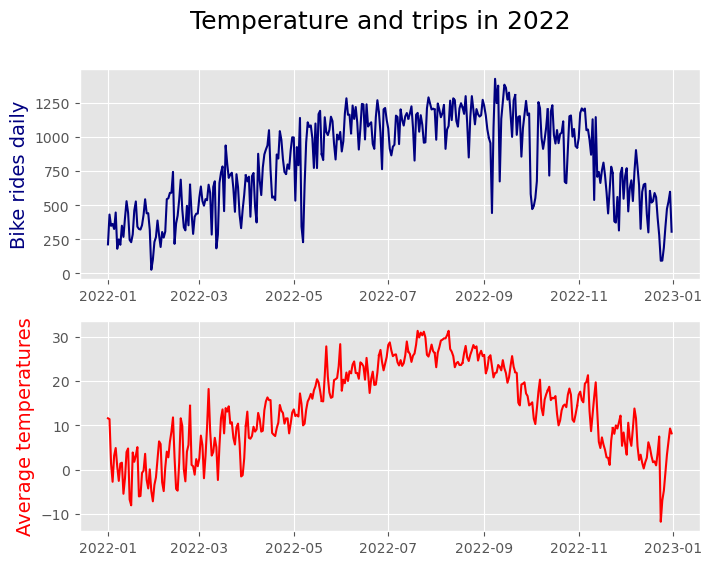

In [631]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

plt.show()

In [632]:
# save the plot as a file
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
